In [162]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

from qiskit.circuit.library import PhaseOracle

# import basic plot tools
from qiskit.visualization import plot_histogram

In [163]:
n = 4

circuit = QuantumCircuit(n)

In [164]:
def initalize_s(qc, qubits):
    for q in qubits:
        circuit.h(q)

In [165]:
qubits = list(range(n))
initalize_s(circuit, qubits)

In [166]:
circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [167]:
def oracle(qc, n):
    qc.mct([0, 2], n-1)

def multicontrolled_z(qc, n):
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)

def diffuser(qc, n):
    for qubit in range(n):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, n)

    for qubit in range(n):
        qc.x(qubit)
        qc.h(qubit)

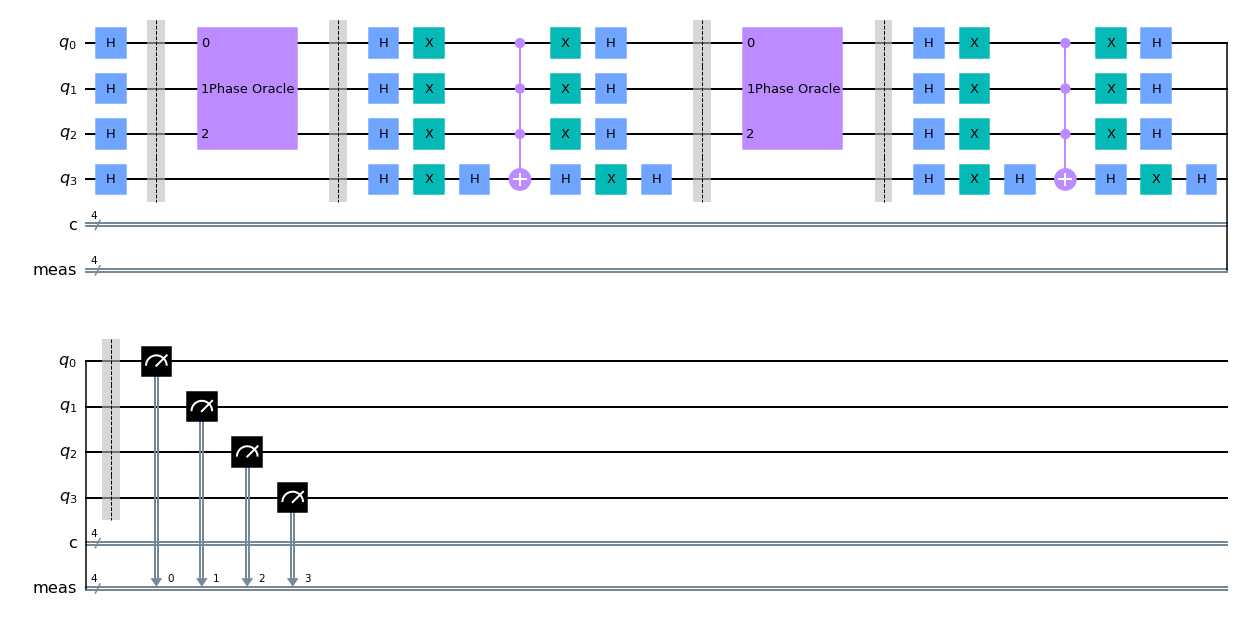

In [168]:

circuit = QuantumCircuit(n, n)

initalize_s(circuit, qubits)
for i in range(2):
    circuit.barrier(list(range(n)))
    circuit.append(PhaseOracle("x & ~y & z"), list(range(3)))
    circuit.barrier(list(range(n)))
    diffuser(circuit, n)

circuit.measure_all()

circuit.draw(output='mpl')

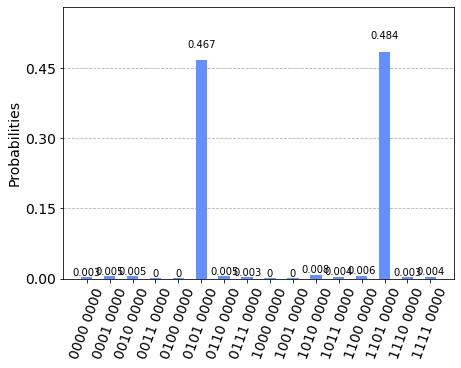

In [169]:
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator).result()
counts = results.get_counts()
plot_histogram(counts)